# ***Python para Traders*** - Banco Modal

### Camila Teixeira

# 4. Análises do mercado financeiro

## 4.1. Obtenção dos dados

Utilizando a biblioteca yfinance, vamos obter os dados de negociação para algum papel, como por exemplo PETR4

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Você pode obter outros ativos que quiser, como ações, FIIs, ETFs, BDRs, etc.

In [2]:
petro = yf.download("PETR4.SA", start="2017-01-01", end="2022-02-10")

[*********************100%***********************]  1 of 1 completed


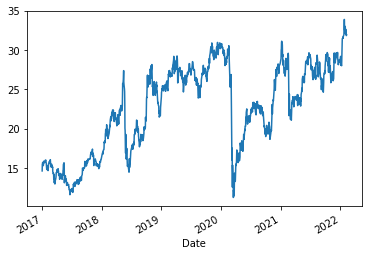

In [3]:
petro.Close.plot();

## 4.2. Médias móveis

Algumas métricas com as quais podemos criar médias móveis: preço, retorno, volatilidade, drawdown

### 4.2.1. Médias móveis do preço

In [4]:
petro.Close.head(10)

Date
2017-01-02    14.66
2017-01-03    15.50
2017-01-04    15.50
2017-01-05    15.75
2017-01-06    15.66
2017-01-09    15.33
2017-01-10    15.48
2017-01-11    15.66
2017-01-12    15.90
2017-01-13    15.68
Name: Close, dtype: float64

In [5]:
# rolling = janela de (5) períodos
petro.Close.rolling(5).mean()

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06    15.414000
                ...    
2022-02-03    32.496000
2022-02-04    32.514000
2022-02-07    32.474001
2022-02-08    32.240001
2022-02-09    32.126001
Name: Close, Length: 1271, dtype: float64

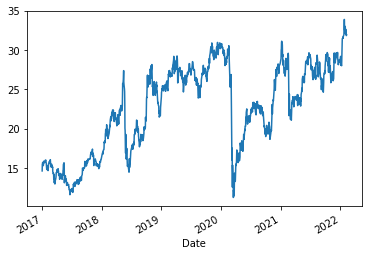

In [6]:
petro.Close.plot();

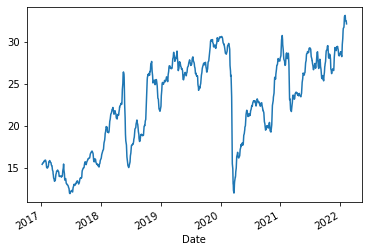

In [7]:
petro.Close.rolling(5).mean().plot();

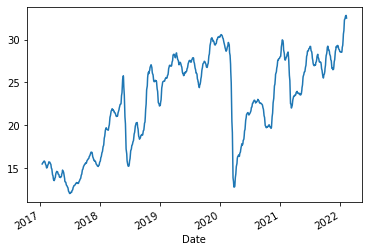

In [8]:
petro.Close.rolling(10).mean().plot();

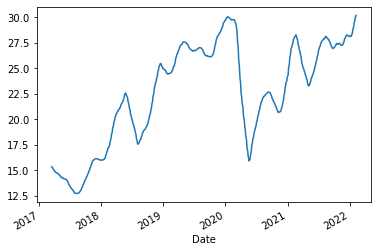

In [9]:
petro.Close.rolling(50).mean().plot();

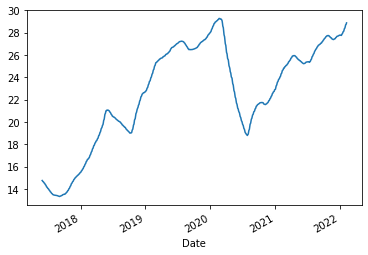

In [10]:
petro.Close.rolling(100).mean().plot();

## 4.3. Retornos diários

In [11]:
petro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,14.64,14.70,14.60,14.66,9.067220,7525700
2017-01-03,14.95,15.65,14.95,15.50,9.586761,39947800
2017-01-04,15.45,15.68,15.31,15.50,9.586761,37071700
2017-01-05,15.70,15.91,15.62,15.75,9.741385,47586300
2017-01-06,15.78,15.92,15.50,15.66,9.685720,25592000


Calculando os retornos diários.

In [12]:
# Para calcular o retorno por linhas
petro['Adj Close'].pct_change()

Date
2017-01-02         NaN
2017-01-03    0.057299
2017-01-04    0.000000
2017-01-05    0.016129
2017-01-06   -0.005714
                ...   
2022-02-03   -0.013838
2022-02-04    0.017462
2022-02-07   -0.014710
2022-02-08   -0.009953
2022-02-09    0.003770
Name: Adj Close, Length: 1271, dtype: float64

In [13]:
retornos = pd.DataFrame(petro['Adj Close'].pct_change())
retornos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,0.057299
2017-01-04,0.000000
2017-01-05,0.016129
2017-01-06,-0.005714
...,...
2022-02-03,-0.013838
2022-02-04,0.017462
2022-02-07,-0.014710


Gráfico dos retornos diários

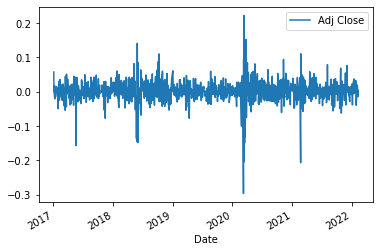

In [14]:
retornos.plot();

Retorno diário médio

In [15]:
retornos.mean()

Adj Close    0.001297
dtype: float64

Média móvel dos retornos

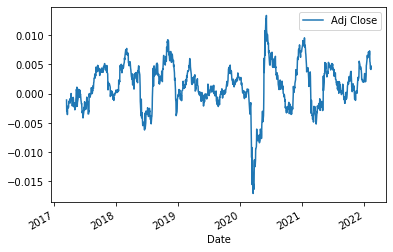

In [16]:
retornos.rolling(50).mean().plot();

## 4.4. Volatilidade

A medida mais básica de volatilidade que podemos ter é o desvio padrão.

Calculando o desvio padrão dos retornos diários.

In [17]:
retornos.std()

Adj Close    0.029894
dtype: float64

Portanto, essa é a volatilidade de PETR4 no período.

Para visualizar a volatilidade em janelas de tempo, isto é, o comportamento da volatilidade de PETR4 ao longo de períodos específicos de tempo, por exemplo, 10 dias.

In [18]:
janelas_vol = retornos.rolling(10).std()

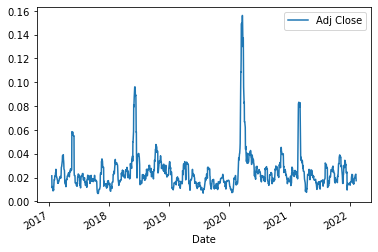

In [19]:
janelas_vol.plot();

## 4.5. Métricas estatísticas

In [20]:
retornos.describe()

,Adj Close
count,1270.000000
mean,0.001297
std,0.029894
min,-0.296978
25%,-0.012087
50%,0.001134
75%,0.014859
max,0.222222


## 4.6. Distribuição dos retornos

Forma de entender onde os retornos se "concentram" com o tempo.

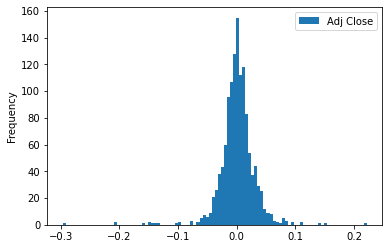

In [21]:
retornos.plot.hist(bins = 100);

## 4.7. Drawdown em janela de 30 dias

Perda máxima em um determinado período - distância entre ganho máximo e a mínima

In [22]:
dd_30 = retornos.rolling(30).min()

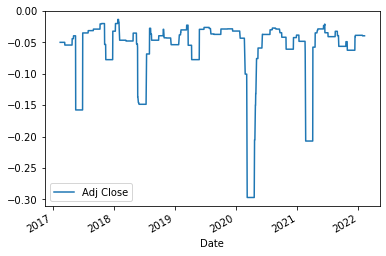

In [23]:
dd_30.plot();

## 4.8. Métricas de retorno acumulado

In [24]:
# Calculando o retorno acumulado
ret_acum = (retornos + 1).cumprod()
ret_acum

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.068213
...,...
2022-02-03,2.901195
2022-02-04,2.951855
2022-02-07,2.908432


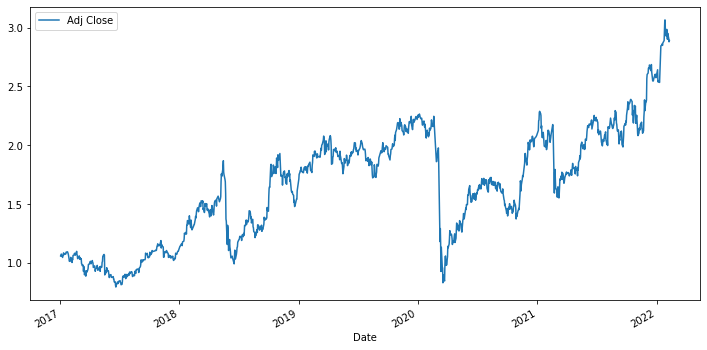

In [25]:
ret_acum.plot(figsize = (12,6));

In [26]:
# Vamos calcular agora o cumulativo máximo, ou seja, os picos atingidos ao longo do tempo
picos = ret_acum.cummax()
picos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.074352
...,...
2022-02-03,3.064935
2022-02-04,3.064935
2022-02-07,3.064935


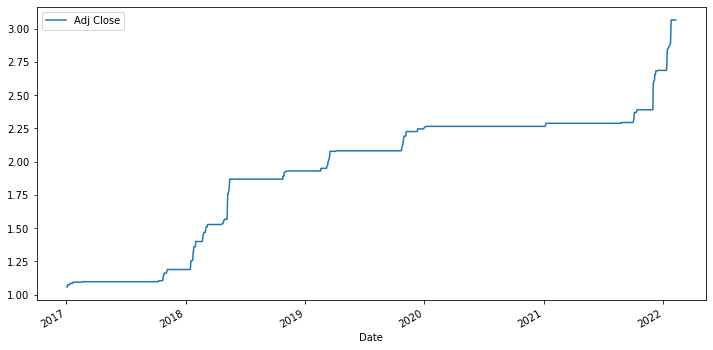

In [27]:
picos.plot(figsize = (12,6));

## 4.9. Drawdown

Forma alternativa de cálculo do drawdown, considerando a diferença entre o retorno acumulado e os picos.

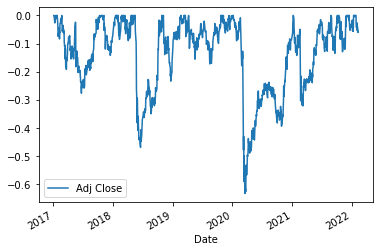

In [28]:
# Aqui calcumos a magnitude da queda desde o pico máximo até o ponto mínimo.

drawdown = (ret_acum - picos)/picos
drawdown.plot();

Qual o drawdown máximo? É justamente o valor mais 'fundo' que o gráfico acima atinge.

In [29]:
max_ddw = drawdown.min()

In [30]:
max_ddw*100

Adj Close   -63.356059
dtype: float64

In [31]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown

In [32]:
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.057299,1.057299,1.057299,0.000000
2017-01-04,0.000000,1.057299,1.057299,0.000000
2017-01-05,0.016129,1.074352,1.074352,0.000000
2017-01-06,-0.005714,1.068213,1.074352,-0.005714


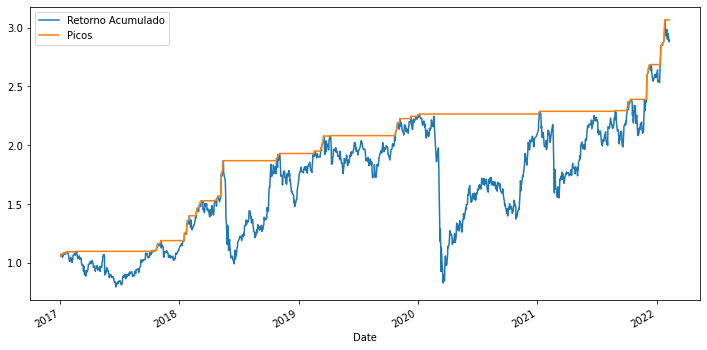

In [33]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (12,6));

## 4.10. Normalização

Para explicar o conceito de normalização, vamos obter dados de vários papéis ao mesmo tempo para ficar mais fácil de exemplificar

In [34]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA','OIBR3.SA']

In [35]:
data = yf.download(acoes, start="2019-01-01", end="2022-05-15")['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [36]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106571,5.641579,1.26,15.524003,39.107300,8.611479
2019-01-03,6.012529,36.637947,5.581217,1.41,15.904678,37.507488,8.807846
2019-01-04,6.225854,35.232075,5.411353,1.41,15.949845,39.949306,8.908427
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201477,39.734978,8.769530
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117699,8.697689


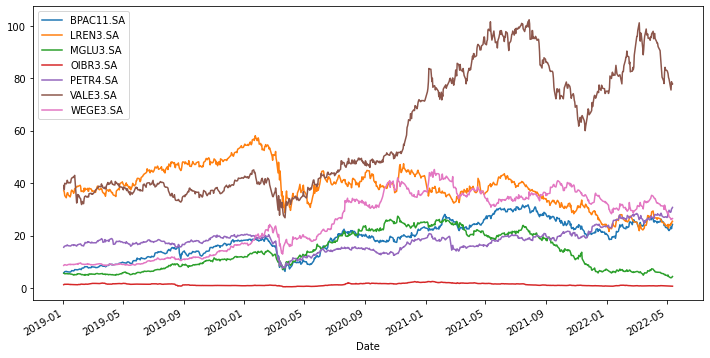

In [37]:
data.plot(figsize = (12,6));

Observe que é 'injusto' realizar uma comparação de um papel numa magnitude mais alta com outros que possuem o preço menor.

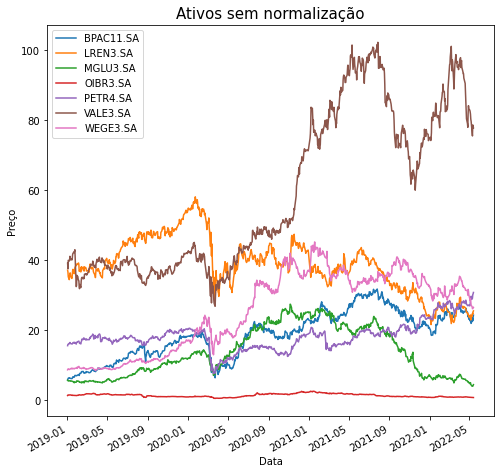

In [38]:
data.plot(figsize = (8,8))
plt.title('Ativos sem normalização', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

Introduzindo conceito da normalização

In [39]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106571,5.641579,1.26,15.524003,39.107300,8.611479
2019-01-03,6.012529,36.637947,5.581217,1.41,15.904678,37.507488,8.807846
2019-01-04,6.225854,35.232075,5.411353,1.41,15.949845,39.949306,8.908427
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201477,39.734978,8.769530
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117699,8.697689


In [40]:
normalizado = data/data.iloc[0]

In [41]:
normalizado.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.041365,0.987371,0.989301,1.119048,1.024522,0.959092,1.022803
2019-01-04,1.078313,0.949483,0.959191,1.119048,1.027431,1.021531,1.034483
2019-01-07,1.100402,0.927669,0.974085,1.126984,1.043640,1.016050,1.018354
2019-01-08,1.079910,0.957520,0.966235,1.095238,1.037406,1.025837,1.010011


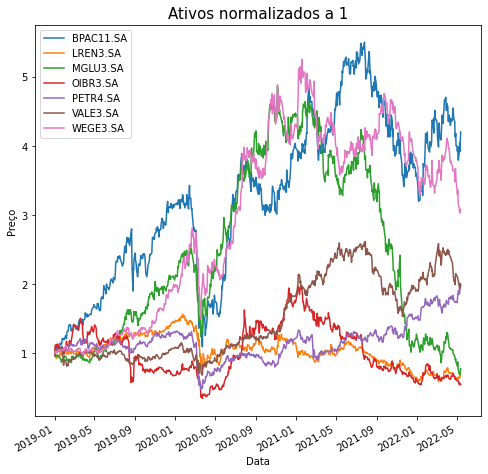

In [42]:
normalizado.plot(figsize = (8,8))
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 4.11. Plot de cotação com volume

Vamos extrair dados para um ativo só

In [43]:
lren = yf.download('LREN3.SA', start = '2017-01-01', end = '2022-05-15')

[*********************100%***********************]  1 of 1 completed


In [44]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484577,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021065,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862385,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696150,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492140,2139141


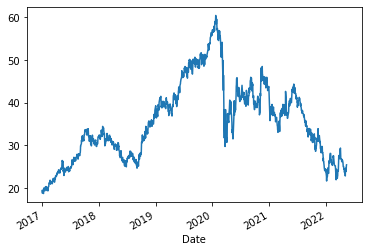

In [45]:
lren.Close.plot();

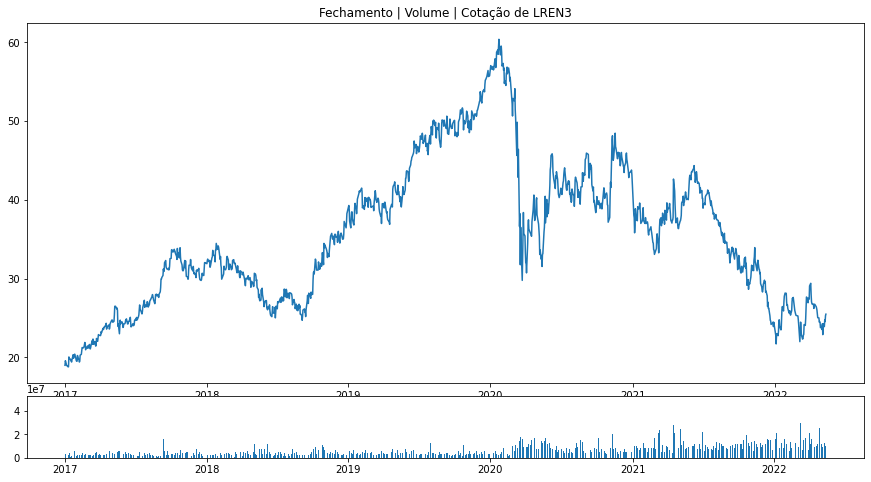

In [46]:
fig = plt.figure(figsize = (15,8));
gs = fig.add_gridspec(nrows = 6, ncols =1);
ax1 = fig.add_subplot(gs[0:5, 0]);
ax2 = fig.add_subplot(gs[5, 0]);

ax1.plot(lren.Close);
ax2.bar(lren.index, lren.Volume);
ax1.set_title('Fechamento | Volume | Cotação de LREN3');

## **Exercício**

Crie uma função que recebe um papel determinado pelo usuário (sem .SA) e cria um plot de cotação e volume, com dimensões e datas (início e fim) também especificadas pelo usuário.

In [47]:
tamanho = (15,8)

In [48]:
def plota_cotacao_volume(papel, tamanho, inicio, fim):
    dados = yf.download(papel + '.SA', start = inicio, end = fim)
    fig = plt.figure(figsize = tamanho)
    gs = fig.add_gridspec(nrows = 6, ncols =1)
    ax1 = fig.add_subplot(gs[0:5, 0])
    ax2 = fig.add_subplot(gs[5, 0])

    ax1.plot(dados.Close)
    ax2.bar(dados.index, dados.Volume)
    # O título do gráfico precisa ser adaptável ao papel determinado pelos usuários
    ax1.set_title(f'Fechamento | Volume | Cotação de {papel}')

[*********************100%***********************]  1 of 1 completed


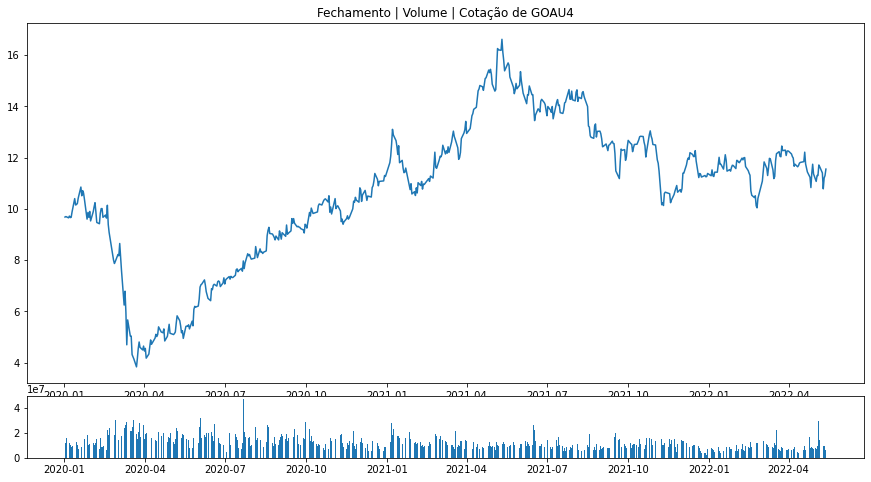

In [49]:
plota_cotacao_volume('GOAU4', tamanho, '2020-01-01', '2022-05-15')

# 5. Estudo de caso: matriz de correlação

## 5.1. Importando dados de FIIs, ETFs e BDRs

In [50]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 
          'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [51]:
inicio = '2017-01-01'

In [52]:
precos_ativos = pd.DataFrame()

for i in ativos:
    precos_ativos[i] = yf.download(i, start = inicio)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
precos_ativos.head()

,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA,AAPL34.SA
Date,,,,,,,,
2017-01-02,137.220779,91.424210,NaN,106.380814,196.671768,54.000000,74.25,8.866642
2017-01-03,137.133408,91.620811,NaN,106.380814,196.088745,55.450001,74.25,8.772818
2017-01-04,138.803635,91.620811,NaN,106.380814,195.797241,56.990002,74.25,8.742321
2017-01-05,138.861877,90.441154,NaN,106.380814,195.505737,56.990002,74.25,8.791581
2017-01-06,139.784409,90.441154,NaN,106.380814,196.283081,56.500000,74.25,8.840842


## 5.2. Importando dados de índices, commodities e criptomoedas

### 5.2.1. Índices

In [54]:
import investpy

In [55]:
search_results = investpy.search_quotes(text = 'bvsp', products = ['indices'],
                      countries = ['brazil'], n_results = 10)

In [56]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [57]:
ibov = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [58]:
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [59]:
search_results = investpy.search_quotes(text = 'spx', products = ['indices'],
                      countries = ['united states'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [60]:
sp500 = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [61]:
sp500.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [62]:
ibov.rename(columns = {'Close': 'IBOV'}, inplace = True)

In [63]:
ibov.head()

,Open,High,Low,IBOV,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [64]:
sp500.rename(columns = {'Close': 'S&P500'}, inplace = True)

In [65]:
sp500.head()

,Open,High,Low,S&P500,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [66]:
indices = pd.merge(ibov, sp500, how = 'inner', on = 'Date')

In [67]:
indices = indices[['IBOV', 'S&P500']]

In [68]:
indices

,IBOV,S&P500
Date,,
2017-01-03,61814.0,2257.83
2017-01-04,61589.0,2270.75
2017-01-05,62071.0,2269.00
2017-01-06,61665.0,2276.98
2017-01-09,61700.0,2268.90
...,...,...
2022-05-09,103250.0,3991.24
2022-05-10,103110.0,4001.05
2022-05-11,104397.0,3935.18


### 5.2.2. Commodities

In [69]:
# Café
search_results = investpy.search_quotes(text = 'coffe', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [70]:
cafe = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [71]:
cafe.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


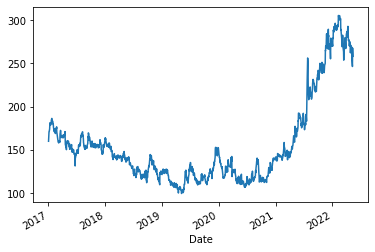

In [72]:
cafe.Close.plot();

In [73]:
cafe.rename(columns = {'Close': 'cafe'}, inplace = True)

In [74]:
cafe.head()

,Open,High,Low,cafe,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


In [75]:
# Soja
search_results = investpy.search_quotes(text = 'soy', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [76]:
soja = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

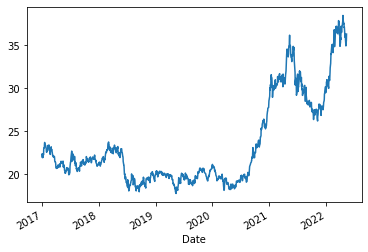

In [77]:
soja.Close.plot();

In [78]:
soja.rename(columns = {'Close': 'soja'}, inplace = True)

In [79]:
# Etanol
search_results = investpy.search_quotes(text = 'ethanol', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": null, "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [80]:
etanol = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

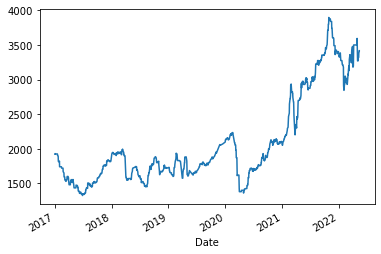

In [81]:
etanol.Close.plot();

In [82]:
etanol.rename(columns = {'Close': 'etanol'}, inplace = True)

In [83]:
interm = pd.merge(cafe, soja, how = 'inner', on = 'Date')
commodities = pd.merge(interm, etanol, how = 'inner', on = 'Date')

In [84]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [85]:
# Outra forma de fazer o merge de mais de dois dataframes é através da biblioteca functools.

from functools import reduce

In [86]:
# Primeiro cria uma lista com dos DF que deseja juntar

lista_dfs = [cafe, soja, etanol]

In [87]:
# Na função reduce é preciso criar uma função anônima lambda que vai receber dois argumentos left, right e vai fazer o merge 
# desses dois argumentos e vai aplicar essa função em lista_dfs.

commodities = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), lista_dfs)

In [88]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [89]:
commodities = commodities[['cafe','soja','etanol']]

In [90]:
commodities.head()

,cafe,soja,etanol
Date,,,
2017-01-02,159.85,22.33,1925.0
2017-01-03,163.30,21.94,1930.0
2017-01-04,168.95,22.38,1925.0
2017-01-05,170.90,22.32,1925.0
2017-01-06,171.00,21.93,1925.0


### 5.2.3. Criptomoedas

In [91]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

In [92]:
bitcoin.rename(columns = {'Close': 'bitcoin'}, inplace = True)

In [93]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

ethereum.rename(columns = {'Close': 'ethereum'}, inplace = True)

In [94]:
cripto = pd.merge(bitcoin, ethereum, how = 'inner', on = 'Date')

In [95]:
cripto = cripto[['bitcoin', 'ethereum']]

In [96]:
cripto.head()

,bitcoin,ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15


## 5.3. Moedas

### 5.3.1. Dados do dólar

In [97]:
dolar = yf.download('USDBRL=X', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [98]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3.2532,3.2797,3.2427,3.2532,3.2532,0
2017-01-03,3.2841,3.2897,3.2475,3.2840,3.2840,0
2017-01-04,3.2635,3.2643,3.2188,3.2635,3.2635,0
2017-01-05,3.2149,3.2276,3.1998,3.2141,3.2141,0
2017-01-06,3.1975,3.2118,3.1894,3.1977,3.1977,0


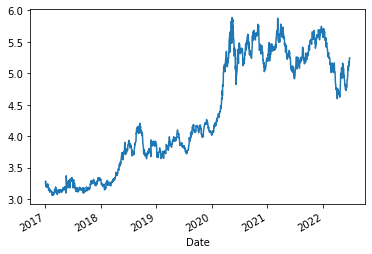

In [99]:
dolar.Close.plot();

In [100]:
dolar = pd.DataFrame(dolar.Close).rename(columns = {'Close': 'Dolar'})

In [101]:
dolar.head()

,Dolar
Date,
2017-01-02,3.2532
2017-01-03,3.2840
2017-01-04,3.2635
2017-01-05,3.2141
2017-01-06,3.1977


## 5.4. Dados de ações

In [102]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106571,5.641579,1.26,15.524003,39.107300,8.611479
2019-01-03,6.012529,36.637947,5.581217,1.41,15.904678,37.507488,8.807846
2019-01-04,6.225854,35.232075,5.411353,1.41,15.949845,39.949306,8.908427
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201477,39.734978,8.769530
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117699,8.697689


### 5.4.1. Juntando tudo num dataframe só

In [103]:
# Dados de ações
data.index = pd.to_datetime(data.index)

# Dados de FIIs, ETFs e BDRs
precos_ativos.index = pd.to_datetime(precos_ativos.index)

# Dados de índices
indices.index = pd.to_datetime(indices.index)

# Dados de commodities
commodities.index = pd.to_datetime(commodities.index)

# Dados de criptomoedas
cripto.index = pd.to_datetime(cripto.index)

# Cotação do dólar
dolar.index = pd.to_datetime(dolar.index)

In [104]:
dfs = [data, precos_ativos, indices, commodities, cripto, dolar]

In [105]:
df_final = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), dfs)

In [106]:
df_final.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.773697,37.106571,5.641579,1.26,15.524003,39.107300,8.611479,145.954956,147.269745,NaN,...,74.25,14.617931,91012.0,2510.03,121.45,20.00,1730.0,3873.8,152.95,3.8799
2019-01-03,6.012529,36.637947,5.581217,1.41,15.904678,37.507488,8.807846,147.535553,147.269745,NaN,...,74.25,13.018452,91564.0,2447.89,124.95,20.12,1730.0,3780.1,146.94,3.7863
2019-01-04,6.225854,35.232075,5.411353,1.41,15.949845,39.949306,8.908427,147.653366,147.091858,NaN,...,74.25,13.226553,91841.0,2531.94,124.20,20.32,1730.0,3802.7,152.86,3.7551
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201477,39.734978,8.769530,146.740341,142.327820,NaN,...,74.25,13.199934,91699.0,2549.69,124.35,20.38,1730.0,3985.9,149.96,3.6612
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117699,8.697689,146.956329,138.384140,NaN,...,74.25,13.596780,92032.0,2574.41,127.40,20.25,1690.0,3971.0,148.41,3.7341


In [107]:
retornos = df_final.pct_change()

In [108]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.041365,-0.012629,-0.010699,0.119048,0.024522,-0.040908,0.022803,0.010829,0.000000,NaN,...,0.0,-0.109419,0.006065,-0.024757,0.028818,0.006000,0.000000,-0.024188,-0.039294,-0.024124
2019-01-04,0.035480,-0.038372,-0.030435,0.000000,0.002840,0.065102,0.011419,0.000799,-0.001208,NaN,...,0.0,0.015985,0.003025,0.034336,-0.006002,0.009940,0.000000,0.005979,0.040289,-0.008240
2019-01-07,0.020484,-0.022975,0.015527,0.007092,0.015776,-0.005365,-0.015592,-0.006184,-0.032388,NaN,...,0.0,-0.002013,-0.001546,0.007010,0.001208,0.002953,0.000000,0.048176,-0.018972,-0.025006
2019-01-08,-0.018622,0.032178,-0.008059,-0.028169,-0.005973,0.009632,-0.008192,0.001472,-0.027708,NaN,...,0.0,0.030064,0.003631,0.009695,0.024528,-0.006379,-0.023121,-0.003738,-0.010336,0.019912


In [109]:
retornos = retornos.dropna()

In [110]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-17,0.004810,-0.004128,0.059020,0.020000,-0.025352,0.012296,-0.045339,0.006935,-0.003031,0.00036,...,0.0,0.008984,-0.012269,-0.005163,0.004751,-0.018163,0.016176,-0.142749,-0.214982,0.004506
2019-07-18,-0.009232,0.007254,0.010680,-0.032680,-0.006142,-0.001898,0.009765,0.000328,-0.006622,0.00000,...,0.0,-0.001702,0.008290,0.003582,0.012608,0.000514,0.001447,0.095462,0.067694,-0.001433
2019-07-19,-0.012597,-0.029836,-0.036235,-0.033784,-0.002545,0.002472,0.001758,-0.000656,0.000816,-0.00036,...,0.0,-0.007870,-0.012080,-0.006177,-0.013230,0.023112,0.008671,-0.007501,-0.022821,-0.011803
2019-07-22,-0.015205,0.008484,0.039067,-0.006993,0.001822,-0.005122,-0.008337,0.000000,0.006389,0.00045,...,0.0,0.020624,0.004804,0.002829,-0.022082,-0.017068,0.000000,-0.015040,-0.012813,0.007667
2019-07-23,-0.006388,-0.021031,-0.021629,0.035211,0.001091,-0.013155,-0.000885,-0.001312,-0.009049,0.00027,...,0.0,0.016840,-0.002357,0.006848,-0.028629,-0.001021,0.020057,-0.050305,-0.024854,-0.001628


## 5.5. Matriz de Correlação

In [113]:
import seaborn as sns

In [114]:
import matplotlib.pyplot as plt

In [115]:
df_final.corr()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
BPAC11.SA,1.000000,-0.211798,0.486284,0.164509,0.463398,0.885591,0.824562,-0.366271,-0.079973,0.361448,...,0.776636,0.796806,0.848896,0.853332,0.565275,0.791279,0.742117,0.753564,0.693547,0.543609
LREN3.SA,-0.211798,1.000000,0.362951,0.361936,-0.497759,-0.475217,-0.303946,0.773224,0.433779,0.340631,...,-0.599031,-0.605579,0.036696,-0.541376,-0.745284,-0.571907,-0.594249,-0.554440,-0.655081,-0.391688
MGLU3.SA,0.486284,0.362951,1.000000,0.639027,-0.426465,0.257835,0.658536,0.360099,-0.066590,0.701904,...,0.363209,0.282218,0.366626,0.135727,-0.329215,0.105270,-0.073577,0.149316,-0.087130,0.555964
OIBR3.SA,0.164509,0.361936,0.639027,1.000000,-0.247665,0.112721,0.291446,0.281564,-0.091793,0.766526,...,-0.019253,-0.042936,0.357586,-0.079716,-0.444395,0.049006,-0.234615,-0.003867,-0.244845,0.023033
PETR4.SA,0.463398,-0.497759,-0.426465,-0.247665,1.000000,0.582706,0.215158,-0.559711,0.141412,-0.134371,...,0.352144,0.512066,0.549961,0.669724,0.819437,0.679241,0.721163,0.500195,0.636398,-0.059074
VALE3.SA,0.885591,-0.475217,0.257835,0.112721,0.582706,1.000000,0.718252,-0.610145,-0.273618,0.277540,...,0.789568,0.800383,0.804704,0.887688,0.700032,0.942443,0.808711,0.845993,0.794166,0.468313
WEGE3.SA,0.824562,-0.303946,0.658536,0.291446,0.215158,0.718252,1.000000,-0.246112,-0.201199,0.478685,...,0.881158,0.869199,0.577684,0.755081,0.432634,0.655310,0.598337,0.706052,0.587150,0.811704
KNRI11.SA,-0.366271,0.773224,0.360099,0.281564,-0.559711,-0.610145,-0.246112,1.000000,0.550592,0.300248,...,-0.546804,-0.535834,-0.233247,-0.634731,-0.776675,-0.630166,-0.702220,-0.621661,-0.752167,-0.192328
ONEF11.SA,-0.079973,0.433779,-0.066590,-0.091793,0.141412,-0.273618,-0.201199,0.550592,1.000000,0.014303,...,-0.412228,-0.281758,0.066218,-0.241396,-0.173968,-0.175493,-0.176086,-0.327541,-0.335054,-0.357616
HCTR11.SA,0.361448,0.340631,0.701904,0.766526,-0.134371,0.277540,0.478685,0.300248,0.014303,1.000000,...,0.118130,0.117994,0.520768,0.113384,-0.294890,0.210111,-0.054761,0.201785,-0.080501,0.181088


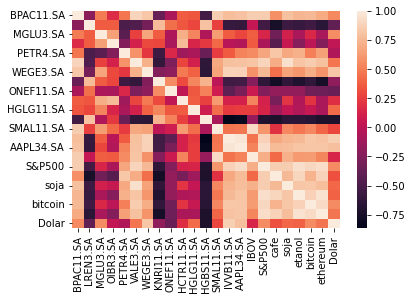

In [116]:
sns.heatmap(df_final.corr());

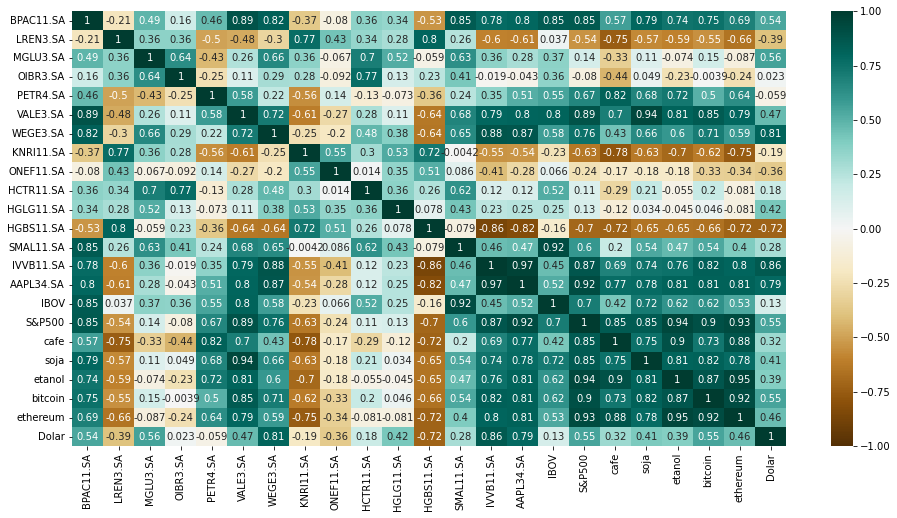

In [117]:
plt.figure(figsize = (16,8));

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG');

# vmin= valor minimo
# vmax= valor minimo
# annot= anotations
# cmap= escala de cor

## 6. Estudo de caso: comparação de carteira com o IBOV

Simplificação: vamos simular um único aporte feito no primeiro dia

### 6.1. Importando dados

In [118]:
ativos = ['PETR4','VALE3', 'ABEV3', 'WEGE3', 'EMBR3', 'RADL3', 'CVCB3', 'CIEL3', 'OIBR3', 'KNRI11']

In [119]:
ativos = [i + '.SA' for i in ativos]

In [120]:
inicio = '2020-01-01'
fim = '2022-05-15'

In [121]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [122]:
df.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,17.917435,7.810123,44.709999,20.200001,195.954865,0.86,20.466219,22.584093,42.689388,17.142607
2020-01-03,17.665468,7.709877,44.200001,20.410000,195.954865,0.86,20.299555,22.080612,42.375092,16.923706
2020-01-06,17.749458,7.518497,43.820000,20.379999,194.364441,0.92,20.539551,21.645958,42.123650,16.967484
2020-01-07,17.786785,7.299777,44.400002,20.500000,195.120392,0.94,20.459551,21.348980,42.430088,17.098822
2020-01-08,17.702797,7.135737,44.340000,20.330000,184.075821,0.92,20.332890,21.634161,42.437946,16.451839


### 6.2. Normalização dos ativos

In [123]:
normalizado = df/df.iloc[0]

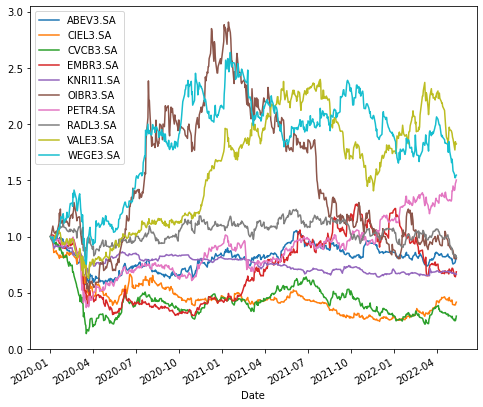

In [124]:
normalizado.plot(figsize = (8,7));

### 6.3. Métricas básicas de carteira

Preços no dia do aporte

In [125]:
primeiro = df.iloc[0]

In [126]:
primeiro

ABEV3.SA      17.917435
CIEL3.SA       7.810123
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    195.954865
OIBR3.SA       0.860000
PETR4.SA      20.466219
RADL3.SA      22.584093
VALE3.SA      42.689388
WEGE3.SA      17.142607
Name: 2020-01-02 00:00:00, dtype: float64

Se investimos R$ 1000 em cada papel, quantos papéis precisamos comprar de cada?

In [127]:
comprados = 1000/primeiro

In [128]:
comprados

ABEV3.SA       55.811561
CIEL3.SA      128.038957
CVCB3.SA       22.366361
EMBR3.SA       49.504949
KNRI11.SA       5.103216
OIBR3.SA     1162.790678
PETR4.SA       48.861004
RADL3.SA       44.278953
VALE3.SA       23.425025
WEGE3.SA       58.334185
Name: 2020-01-02 00:00:00, dtype: float64

In [129]:
# Número de papéis arredondados
round(comprados, 0)

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       49.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

In [130]:
comprados = round(comprados, 0)

In [131]:
comprados

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       49.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

### 6.4. Construção da carteira e da comparação com o IBOV

Para saber qual era o valor que tínhamos em cada papel, por dia, basta multiplicar o número de papéis que compramos com os preços diários.

In [132]:
PL = df*comprados

In [133]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376343,999.695740,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700096,981.855930,994.271191
2020-01-03,989.266220,986.864197,972.400017,1020.499992,979.774323,1000.180017,994.678186,971.546936,974.627106,981.574951
2020-01-06,993.969666,962.367676,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422150,968.843941,984.114044
2020-01-07,996.059967,934.371399,976.800034,1025.000000,975.601959,1093.219997,1002.517992,939.355118,975.892025,991.731655
2020-01-08,991.356628,913.374329,975.480003,1016.499996,920.379105,1069.960019,996.311588,951.903084,976.072765,954.206688


In [134]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-05-09,766.639977,391.171387,247.500000,657.499981,658.303146,802.469997,1414.099188,832.920013,1759.269951,1546.279991
2022-05-10,768.879974,394.981506,261.580008,652.500010,655.024033,837.360033,1426.410965,834.679970,1737.420021,1514.960049
2022-05-11,781.199989,391.679993,247.279995,648.500013,654.825363,814.099986,1476.097990,812.239960,1809.870056,1513.800022
2022-05-12,810.879974,407.040009,261.799992,667.999983,648.465881,814.099986,1487.530401,827.199966,1791.700035,1531.779991
2022-05-13,814.239998,416.000000,287.320009,692.999983,652.589645,802.469997,1506.877480,811.360023,1789.629944,1537.000000


In [135]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [136]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2020-01-02,1003.376343,999.695740,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700096,981.855930,994.271191,9949.318385
2020-01-03,989.266220,986.864197,972.400017,1020.499992,979.774323,1000.180017,994.678186,971.546936,974.627106,981.574951,9871.411945
2020-01-06,993.969666,962.367676,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422150,968.843941,984.114044,9892.977639
2020-01-07,996.059967,934.371399,976.800034,1025.000000,975.601959,1093.219997,1002.517992,939.355118,975.892025,991.731655,9910.550146
2020-01-08,991.356628,913.374329,975.480003,1016.499996,920.379105,1069.960019,996.311588,951.903084,976.072765,954.206688,9765.544206


In [137]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2022-05-09,766.639977,391.171387,247.500000,657.499981,658.303146,802.469997,1414.099188,832.920013,1759.269951,1546.279991,9076.153631
2022-05-10,768.879974,394.981506,261.580008,652.500010,655.024033,837.360033,1426.410965,834.679970,1737.420021,1514.960049,9083.796568
2022-05-11,781.199989,391.679993,247.279995,648.500013,654.825363,814.099986,1476.097990,812.239960,1809.870056,1513.800022,9149.593368
2022-05-12,810.879974,407.040009,261.799992,667.999983,648.465881,814.099986,1487.530401,827.199966,1791.700035,1531.779991,9248.496219
2022-05-13,814.239998,416.000000,287.320009,692.999983,652.589645,802.469997,1506.877480,811.360023,1789.629944,1537.000000,9310.487079


Vamos obter agora os dados do IBOV para compará-lo com nossa carteira

In [138]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [139]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [140]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [141]:
ibov = ibov[['Ibov']]

In [142]:
ibov

,Ibov
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2022-05-09,103250.0
2022-05-10,103110.0
2022-05-11,104397.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [143]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [144]:
novo_df.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376343,999.695740,983.619980,1010.000038,979.774323,1000.180017,1002.844728,993.700096,981.855930,994.271191,9949.318385
2020-01-03,117707.0,989.266220,986.864197,972.400017,1020.499992,979.774323,1000.180017,994.678186,971.546936,974.627106,981.574951,9871.411945
2020-01-06,116878.0,993.969666,962.367676,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422150,968.843941,984.114044,9892.977639
2020-01-07,116662.0,996.059967,934.371399,976.800034,1025.000000,975.601959,1093.219997,1002.517992,939.355118,975.892025,991.731655,9910.550146
2020-01-08,116247.0,991.356628,913.374329,975.480003,1016.499996,920.379105,1069.960019,996.311588,951.903084,976.072765,954.206688,9765.544206


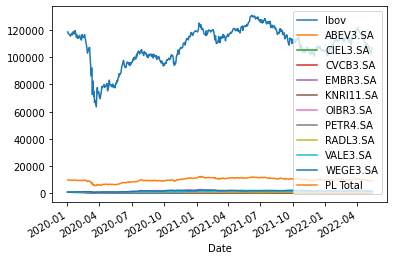

In [145]:
novo_df.plot();

Vamos normalizar tudo para colocá-los na mesma base, ou seja, todos começam com 100

In [146]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [147]:
novo_normalizado

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593736,98.716455,98.859319,101.039599,100.000000,100.000000,99.185662,97.770639,99.263759,98.723061,99.216967
2020-01-06,98.570501,99.062498,96.266058,98.009395,100.891081,99.188372,106.976744,100.358307,95.846036,98.674756,98.978433,99.433723
2020-01-07,98.388335,99.270824,93.465578,99.306648,101.485145,99.574151,109.302323,99.967419,94.531048,99.392589,99.744583,99.610343
2020-01-08,98.038339,98.802073,91.365232,99.172447,100.643560,93.937867,106.976744,99.348539,95.793800,99.410997,95.970465,98.152897
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,87.077159,76.406025,39.129044,25.162157,65.099006,67.189263,80.232557,141.008787,83.820060,179.178013,155.518937,91.223874
2022-05-10,86.959088,76.629271,39.510172,26.593605,64.603959,66.854582,83.720932,142.236472,83.997171,176.952643,152.368897,91.300692
2022-05-11,88.044496,77.857127,39.179920,25.139790,64.207920,66.834305,81.395346,147.191080,81.738943,184.331530,152.252226,91.962012


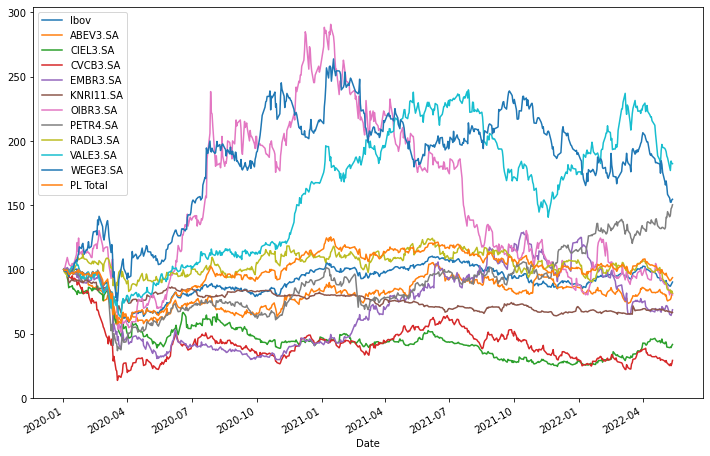

In [148]:
novo_normalizado.plot(figsize=(12,8));

In [149]:
novo_normalizado.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406025,39.129044,25.162157,65.099006,67.189263,80.232557,141.008787,83.820060,179.178013,155.518937,91.223874
2022-05-10,86.959088,76.629271,39.510172,26.593605,64.603959,66.854582,83.720932,142.236472,83.997171,176.952643,152.368897,91.300692
2022-05-11,88.044496,77.857127,39.179920,25.139790,64.207920,66.834305,81.395346,147.191080,81.738943,184.331530,152.252226,91.962012
2022-05-12,89.133277,80.815138,40.716389,26.615969,66.138610,66.185229,81.395346,148.331078,83.244429,182.480951,154.060583,92.956079
2022-05-13,90.175672,81.150010,41.612661,29.210469,68.613857,66.606118,80.232557,150.260298,81.650392,182.270116,154.585591,93.579145


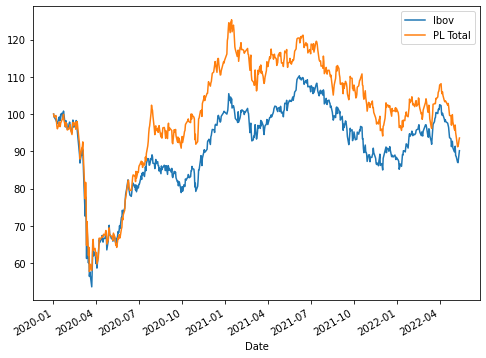

In [150]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6));

Para conseguir determinar quanto você investiria em cada ativo:

In [151]:
ativos

['PETR4.SA',
 'VALE3.SA',
 'ABEV3.SA',
 'WEGE3.SA',
 'EMBR3.SA',
 'RADL3.SA',
 'CVCB3.SA',
 'CIEL3.SA',
 'OIBR3.SA',
 'KNRI11.SA']

In [152]:
alocacoes = {'PETR4.SA':2000,
 'VALE3.SA':2000,
 'ABEV3.SA':1000,
 'WEGE3.SA':1000,
 'EMBR3.SA':500,
 'RADL3.SA':500,
 'CVCB3.SA':500,
 'CIEL3.SA':500,
 'OIBR3.SA':500,
 'KNRI11.SA':1500}

In [153]:
alocacoes

{'PETR4.SA': 2000,
 'VALE3.SA': 2000,
 'ABEV3.SA': 1000,
 'WEGE3.SA': 1000,
 'EMBR3.SA': 500,
 'RADL3.SA': 500,
 'CVCB3.SA': 500,
 'CIEL3.SA': 500,
 'OIBR3.SA': 500,
 'KNRI11.SA': 1500}

In [154]:
alocacoes.keys()

dict_keys(['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'WEGE3.SA', 'EMBR3.SA', 'RADL3.SA', 'CVCB3.SA', 'CIEL3.SA', 'OIBR3.SA', 'KNRI11.SA'])

In [155]:
alocacoes_df = pd.Series(data = alocacoes, index = list(alocacoes.keys()))

In [156]:
alocacoes.values()

dict_values([2000, 2000, 1000, 1000, 500, 500, 500, 500, 500, 1500])

In [157]:
sum(alocacoes.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [158]:
primeiro = df.iloc[0]

In [159]:
primeiro

ABEV3.SA      17.917435
CIEL3.SA       7.810123
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    195.954865
OIBR3.SA       0.860000
PETR4.SA      20.466219
RADL3.SA      22.584093
VALE3.SA      42.689388
WEGE3.SA      17.142607
Name: 2020-01-02 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo (determinados no primeiro dia)

In [160]:
compras = alocacoes_df/primeiro

In [161]:
compras = round(compras, 0)

In [162]:
compras

ABEV3.SA      56.0
CIEL3.SA      64.0
CVCB3.SA      11.0
EMBR3.SA      25.0
KNRI11.SA      8.0
OIBR3.SA     581.0
PETR4.SA      98.0
RADL3.SA      22.0
VALE3.SA      47.0
WEGE3.SA      58.0
dtype: float64

Criando um dataframe que contém a posição diária de cada ativo

In [163]:
PL02 = df*compras

In [164]:
PL02.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376343,499.847870,491.809990,505.000019,1567.638916,499.660008,2005.689457,496.850048,2006.401249,994.271191
2020-01-03,989.266220,493.432098,486.200008,510.249996,1567.638916,499.660008,1989.356373,485.773468,1991.629303,981.574951
2020-01-06,993.969666,481.183838,482.019997,509.499979,1554.915527,534.520010,2012.875977,476.211075,1979.811531,984.114044
2020-01-07,996.059967,467.185699,488.400017,512.500000,1560.963135,546.139999,2005.035984,469.677559,1994.214138,991.731655
2020-01-08,991.356628,456.687164,487.740002,508.249998,1472.606567,534.520010,1992.623177,475.951542,1994.583477,954.206688


In [165]:
PL02['PL Total'] = PL02.sum(axis = 1)

In [166]:
novo_df02 = pd.merge(ibov, PL02, how = 'inner', on = 'Date')

In [167]:
novo_df02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376343,499.847870,491.809990,505.000019,1567.638916,499.660008,2005.689457,496.850048,2006.401249,994.271191,10070.545091
2020-01-03,117707.0,989.266220,493.432098,486.200008,510.249996,1567.638916,499.660008,1989.356373,485.773468,1991.629303,981.574951,9994.781342
2020-01-06,116878.0,993.969666,481.183838,482.019997,509.499979,1554.915527,534.520010,2012.875977,476.211075,1979.811531,984.114044,10009.121643
2020-01-07,116662.0,996.059967,467.185699,488.400017,512.500000,1560.963135,546.139999,2005.035984,469.677559,1994.214138,991.731655,10031.908153
2020-01-08,116247.0,991.356628,456.687164,487.740002,508.249998,1472.606567,534.520010,1992.623177,475.951542,1994.583477,954.206688,9868.525253


In [168]:
novo_normalizado_02 = (novo_df02/novo_df02.iloc[0])*100

In [169]:
novo_normalizado_02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593736,98.716455,98.859319,101.039599,100.000000,100.000000,99.185662,97.770639,99.263759,98.723061,99.247670
2020-01-06,98.570501,99.062498,96.266058,98.009395,100.891081,99.188372,106.976744,100.358307,95.846036,98.674756,98.978433,99.390068
2020-01-07,98.388335,99.270824,93.465578,99.306648,101.485145,99.574151,109.302323,99.967419,94.531048,99.392589,99.744583,99.616337
2020-01-08,98.038339,98.802073,91.365232,99.172447,100.643560,93.937867,106.976744,99.348539,95.793800,99.410997,95.970465,97.993953


In [170]:
novo_normalizado_02.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406025,39.129044,25.162157,65.099006,67.189263,80.232557,141.008787,83.820060,179.178013,155.518937,111.760276
2022-05-10,86.959088,76.629271,39.510172,26.593605,64.603959,66.854582,83.720932,142.236472,83.997171,176.952643,152.368897,111.466372
2022-05-11,88.044496,77.857127,39.179920,25.139790,64.207920,66.834305,81.395346,147.191080,81.738943,184.331530,152.252226,113.696891
2022-05-12,89.133277,80.815138,40.716389,26.615969,66.138610,66.185229,81.395346,148.331078,83.244429,182.480951,154.060583,114.246906
2022-05-13,90.175672,81.150010,41.612661,29.210469,68.613857,66.606118,80.232557,150.260298,81.650392,182.270116,154.585591,114.898828


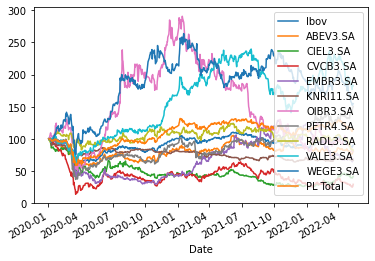

In [171]:
novo_normalizado_02.plot();

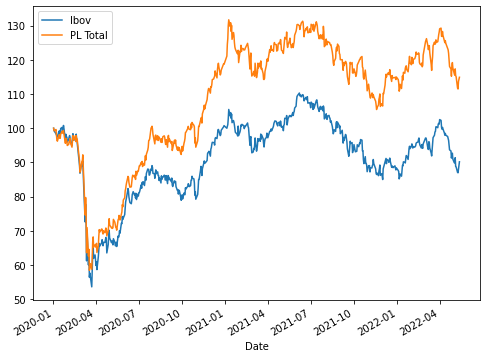

In [172]:
novo_normalizado_02[['Ibov','PL Total']].plot(figsize = (8,6));

# **Exercício**

Crie uma função que recebe um dicionário de alocações definido pelo usuário, e compara essa carteira com o Ibov. As datas de início e fim também devem ser definidas pelo usuário.

In [173]:
# Dicionário de alocações

alocacoes = {'PETR4.SA':2000,
 'VALE3.SA':2000,
 'ABEV3.SA':1000}

In [174]:
ativos = ['PETR4.SA', 'VALE3.SA', 'ABEV3.SA']

In [175]:
def compara_carteiras(ativos, dicionario, inicio, fim):
    df = yf.download(ativos, start = inicio, end = fim)['Adj Close']
    alocacoes_df = pd.Series(data = dicionario, index = list(dicionario.keys()))
    primeiro = df.iloc[0]
    compras = alocacoes_df/primeiro
    compras = round(compras, 0)
    PL00 = df*compras
    PL00['PL Total'] = PL00.sum(axis = 1)
    ibov = yf.download('^BVSP', start = inicio, end = fim)
    ibov.rename(columns = {'Close':'Ibov'}, inplace = True)
    novo_df00 = pd.merge(ibov, PL00, how = 'inner', on = 'Date')
    novo_normalizado_00 = (novo_df00/novo_df00.iloc[0])*100
    novo_normalizado_00[['Ibov','PL Total']].plot(figsize = (8,6))

In [176]:
inicio

'2020-01-01'

In [177]:
fim

'2022-05-15'

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


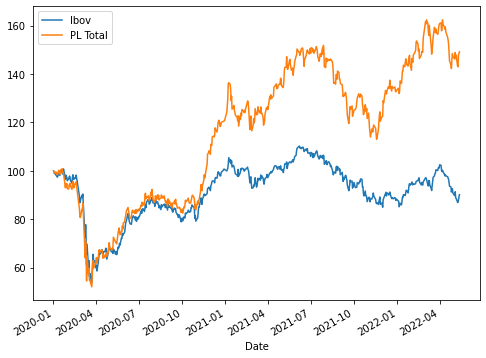

In [178]:
compara_carteiras(ativos, alocacoes, inicio, fim)

In [179]:
lista_ativos = ['PETR4.SA', 'MGLU3.SA', 'WEGE3.SA']

carteira = {'PETR4.SA':2000,
 'MGLU3.SA':3000,
 'WEGE3.SA':13000}

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


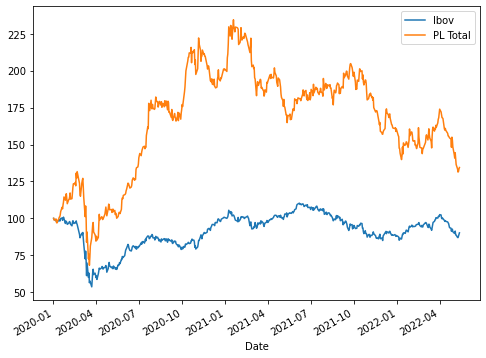

In [180]:
compara_carteiras(lista_ativos, carteira, inicio, fim)